In [33]:
import pandas as pd
import numpy as np
import cv2 as cv
import os
from tqdm import tqdm,trange
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
import torch
from torchvision.transforms import ToTensor
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D, Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix
import time
from PIL import Image,ImageEnhance
import tensorflow as tf
from itertools import islice


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



import warnings
warnings.filterwarnings("ignore")


In [13]:
max_frames = 5
max_df = 2
window_size=3
supersteps = (max_frames-window_size+1)

df_train0 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_0/metadata.json').T
df_train1 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_1/metadata.json').T
df_train2 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_2/metadata.json').T
df_train3 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_3/metadata.json').T
df_train4 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_4/metadata.json').T
df_train5 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_5/metadata.json').T
df_train6 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_6/metadata.json').T
df_train7 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_7/metadata.json').T
df_train8 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_8/metadata.json').T
df_train9 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_9/metadata.json').T
df_train10 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_10/metadata.json').T
df_train11 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_11/metadata.json').T
df_train12 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_12/metadata.json').T
df_train13 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_13/metadata.json').T
df_train14 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_14/metadata.json').T
df_train15 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_15/metadata.json').T
df_train16 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_16/metadata.json').T
df_train17 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_17/metadata.json').T
df_train18 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_18/metadata.json').T
df_train19 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_19/metadata.json').T
df_train20 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_20/metadata.json').T
df_train21 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_21/metadata.json').T
df_train22 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_22/metadata.json').T
df_train23 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_23/metadata.json').T
df_train24 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_24/metadata.json').T
df_train25 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_25/metadata.json').T
df_train26 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_26/metadata.json').T
df_train27 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_27/metadata.json').T
df_train28 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_28/metadata.json').T
df_train29 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_29/metadata.json').T
df_train30 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_30/metadata.json').T
df_train31 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_31/metadata.json').T
df_train32 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_32/metadata.json').T
df_train33 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_33/metadata.json').T
df_train34 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_34/metadata.json').T
df_train35 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_35/metadata.json').T
df_train36 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_36/metadata.json').T
df_train37 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_37/metadata.json').T
df_train38 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_38/metadata.json').T
df_train39 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_39/metadata.json').T
df_train40 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_40/metadata.json').T
df_train41 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_41/metadata.json').T
df_train42 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_42/metadata.json').T
df_train43 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_43/metadata.json').T
df_train44 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_44/metadata.json').T
df_train45 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_45/metadata.json').T
df_train46 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_46/metadata.json').T





df_train47 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_47/metadata.json').T
df_train48 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_48/metadata.json').T
df_train49 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_49/metadata.json').T






df_train_all = [df_train0, df_train1, df_train2, df_train3, df_train4, df_train5, df_train6, df_train7, df_train8, df_train9, 
                df_train10, df_train11, df_train12, df_train13, df_train14, df_train15, df_train16, df_train17, df_train18,
                df_train19, df_train20, df_train21, df_train22, df_train23, df_train24, df_train25, df_train26, df_train27,
                df_train28, df_train29, df_train30, df_train31, df_train32, df_train33, df_train34, df_train35, df_train36, 
                df_train37, df_train38, df_train39, df_train40, df_train41, df_train42, df_train43, df_train44, df_train45, 
                df_train46, df_train47, df_train48, df_train49]


df_test_all = [df_train47, df_train48, df_train49]


In [14]:
result = pd.concat(df_train_all)
result.head()

,label,split,original
owxbbpjpch.mp4,FAKE,train,wynotylpnm.mp4
vpmyeepbep.mp4,REAL,train,NaN
fzvpbrzssi.mp4,REAL,train,NaN
htorvhbcae.mp4,FAKE,train,wclvkepakb.mp4
fckxaqjbxk.mp4,FAKE,train,vpmyeepbep.mp4


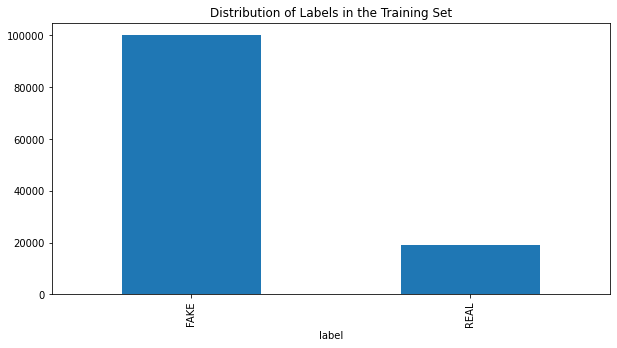

In [15]:
result.groupby('label')['label'].count().plot(figsize=(10, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

In [16]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [17]:
missing_data(result)

,label,split,original
Total,0,0,19154
Percent,0,0,16.075
Types,object,object,object


In [19]:
missing_data(result.loc[result.label=='REAL'])

,label,split,original
Total,0,0,19154
Percent,0,0,100
Types,object,object,object


In [43]:
fake_train_sample_video = list(df_train1.loc[df_train1.label=='FAKE'].sample(3).index)
fake_train_sample_video

['dpmngbibio.mp4', 'cynckdnzjh.mp4', 'znlqssjeyx.mp4']

In [44]:
def display_image_from_video(video_path):
    '''
    input: video_path - path for video
    process:
    1. perform a video capture from the video
    2. read the image
    3. display the image
    '''
    capture_image = cv.VideoCapture(video_path) 
    ret, frame = capture_image.read()
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    ax.imshow(frame)

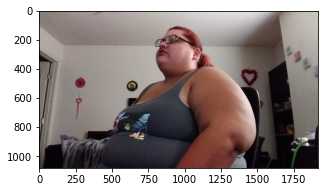

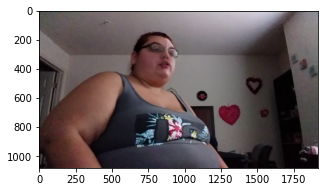

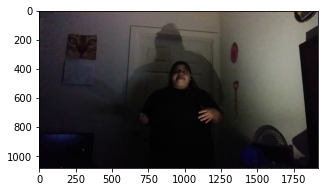

In [45]:
TRAIN_SAMPLE_FOLDER = "/home/aelbakry1999/dfdc/dfdc_train_part_1/"
for video_file in fake_train_sample_video:
    path = os.path.join(TRAIN_SAMPLE_FOLDER, video_file)
    display_image_from_video(path)

In [51]:
real_train_sample_video = list(df_train49.loc[df_train49.label=='REAL'].sample(3).index)
real_train_sample_video

['ttobmbsfoo.mp4', 'iidsevbnrs.mp4', 'bjszzfmchp.mp4']

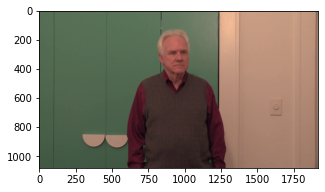

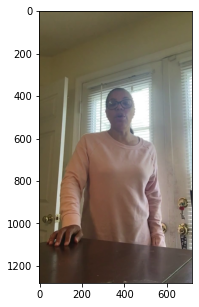

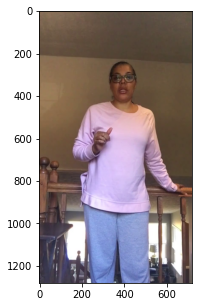

In [52]:
TRAIN_SAMPLE_FOLDER = "/home/aelbakry1999/dfdc/dfdc_train_part_49/"

for video_file in real_train_sample_video:
    display_image_from_video(os.path.join(TRAIN_SAMPLE_FOLDER, video_file))